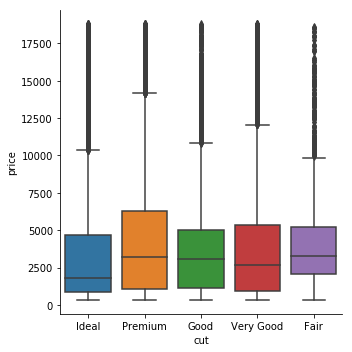

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm  # one way to do regs
from sklearn.linear_model import LinearRegression

diamonds = sns.load_dataset('diamonds')

# remember the relationship between the quality of diamonds and their price:
# low quality diamonds (poor cuts, bad colours, and inferior clarity) have higher prices
sns.catplot(data=diamonds,
                y='price',x='cut',kind='box')



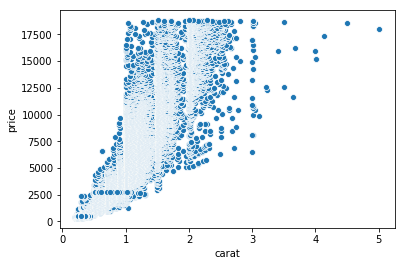

In [6]:
sns.scatterplot(data=diamonds,y='price',x='carat')

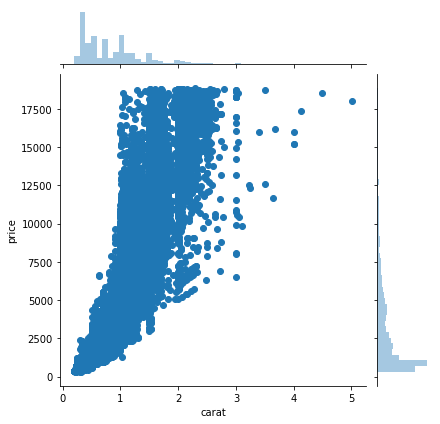

In [10]:
sns.jointplot(data=diamonds,y='price',x='carat')

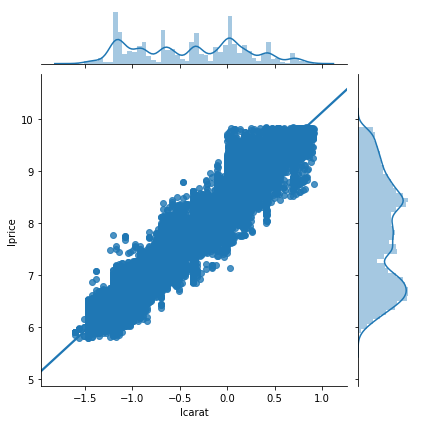

In [19]:
diamonds2 = (diamonds.query('carat < 2.5')
             .assign(lprice = np.log(diamonds2['price']))
             .assign(lcarat = np.log(diamonds2['carat']))
             .assign(const = 1))

sns.jointplot(data=diamonds2,y='lprice',x='lcarat',kind='reg')

#diamonds2['lprice'] = np.log(diamonds2['lprice'])

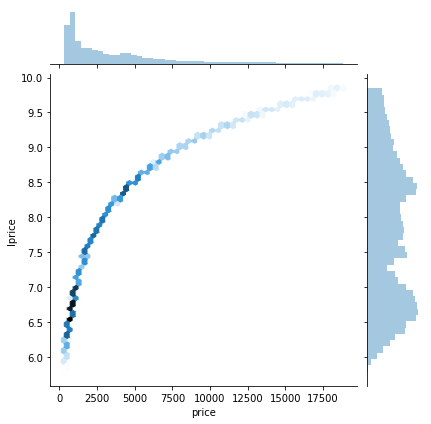

In [13]:
sns.jointplot(data=diamonds2,y='lprice',x='price',kind='hex')

In [22]:
#regress
#relationship between lprice and lcarat?
#
y = diamonds2['lprice']
x = diamonds2[['const','lcarat']]
model1 = sm.OLS(y,x)
results1 = model1.fit()
print(results1.summary())
resid1 = results1.resid     # can put resid1 in df if you want





                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.542e+05
Date:                Thu, 19 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:12:16   Log-Likelihood:                -4073.2
No. Observations:               53797   AIC:                             8150.
Df Residuals:                   53795   BIC:                             8168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4525      0.001   6193.432      0.0

In [23]:
model = LinearRegression()
model.fit(x,y)
model.coef_

array([0.        , 1.68193567])

In [ ]:
# sm framework
model1 = sm.OLS(diamonds)
results1 = model1.fit(diamonds)
print(results1.summary(diamonds))
resid1 = results1.resid     # can put resid1 in df if you want

# sklearn framework
X = ... # 
y = ... 
model = LinearRegression()
model.fit(X, y)
y_predict = model.predict(X)
resid1 = y - y_predict